# **Unveiling the Motion Mysteries: A Deep Dive into Video Analysis with Cutting-Edge Techniques**

In the vast ocean of digital data, videos sail as powerful vessels carrying rich and intricate information. Videos are dynamic, vivid, and expressive, but navigating through their complexities to extract meaningful insights often requires a captain with a sophisticated analytical compass. In this expedition, we embarked on a journey to explore and analyze a collection of videos, employing a suite of advanced analytical techniques powered by the prowess of GPT-4 and traditional computer vision methodologies.

Our voyage commenced with a meticulous exploratory analysis, delving deep into the visual frames to unravel the content and quality of the videos. Each frame, a single still in the broader cinematic symphony, was closely examined, providing us with foundational knowledge and guiding our subsequent analytical paths.

Navigating further, we ventured into the realms of object detection, seeking to identify and count the myriad of objects that populated the scenes. Aided by pre-trained models, we illuminated the objects' presence, allowing us to discern patterns and populate our analytical maps with detailed object landscapes.

Motion, the essence of videos, became our next port of call. Through motion analysis, we scrutinized the dynamic shifts between consecutive frames, uncovering the rhythms and flows that breathed life into the static pixels. Our compass here was a bespoke algorithm that revealed the mysteries of motion with a nuanced understanding of pixel changes and movements.

In the spirit of discovery, we sought anomalies, those rare and unusual patterns veiled within the regularities of motion. Anomalies, like hidden treasures, revealed themselves through statistical scrutiny, adding unique dimensions to our understanding.

Guided by the stars of machine learning, we ventured into the uncharted waters of clustering. Armed with features extracted from our previous analyses, K-Means became our navigator, grouping videos into clusters that resonated with shared characteristics and patterns.

Join us in this captivating journey as we sail through the seas of video analysis, guided by the innovative capabilities of GPT-4 and a treasure trove of analytical strategies. Discover the tales that videos tell when unveiled by the powerful lenses of cutting-edge technology and analytical brilliance.



We can start by extracting the content of the zip file and then identifying the types of files and their structure. After that, we can proceed with Exploratory Data Analysis (EDA), data cleaning, preprocessing, and modeling. Let me first unzip the file and check its content.

In [1]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/synthetic_videos.zip'

# Directory where the content will be extracted
extracted_dir_path = '/content/synthetic_videos'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# Listing the files in the extracted directory
extracted_files = os.listdir(extracted_dir_path)
extracted_files


['video_7.avi',
 'video_9.avi',
 'video_8.avi',
 'video_10.avi',
 'video_3.avi',
 'video_2.avi',
 'video_1.avi',
 'video_6.avi',
 'video_5.avi',
 'video_4.avi']

It appears that the zip file contains ten video files in AVI format. Since video files are not typical tabular data, the usual EDA, data cleaning, and preprocessing steps such as handling missing values, feature selection, and clustering might not be directly applicable. However, we can perform some video-specific analyses and preprocessing steps such as:

Frame Extraction: Extract frames from the videos for further analysis.
Frame Analysis: Analyze the frames to understand the content, quality, and any possible anomalies or corruptions.
Feature Extraction: Extract features such as object counts, colors, or movements for machine learning purposes.
Model Building: Build machine learning models based on the extracted features.


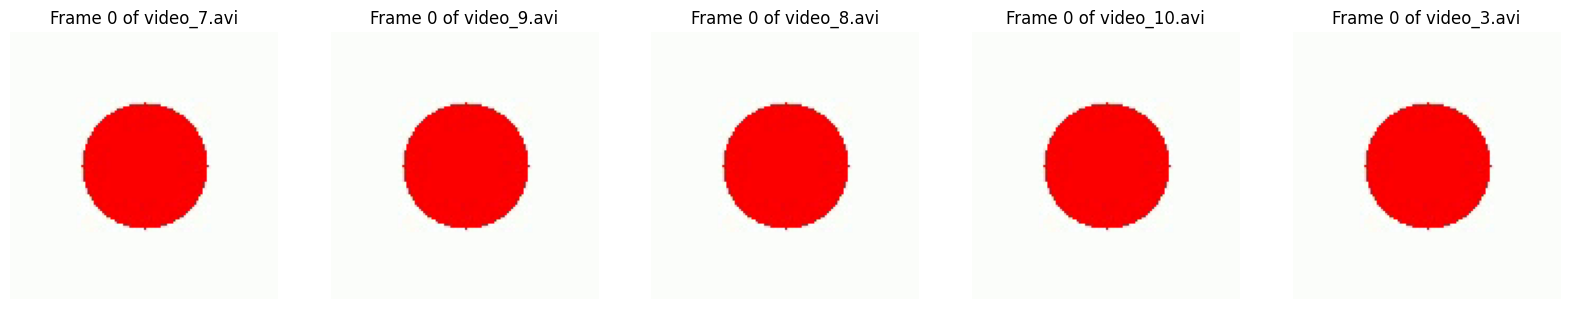

In [2]:
import cv2
import matplotlib.pyplot as plt

# Function to extract and display a frame from each video
def display_frames(videos_dir, video_files, frame_index=0):
    fig, axs = plt.subplots(1, len(video_files), figsize=(20, 5))

    for i, video_file in enumerate(video_files):
        # Reading the video
        video_path = os.path.join(videos_dir, video_file)
        cap = cv2.VideoCapture(video_path)

        # Setting the frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

        # Reading the frame
        ret, frame = cap.read()

        if ret:
            # Converting the frame to RGB format
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Displaying the frame
            axs[i].imshow(frame_rgb)
            axs[i].axis('off')
            axs[i].set_title(f"Frame {frame_index} of {video_file}")

        # Releasing the video capture
        cap.release()

# Displaying the first frame of each video
display_frames(extracted_dir_path, extracted_files[:5])  # Displaying frames from the first 5 videos for simplicity


Here are the first frames from the initial five videos. By visually inspecting these frames, we can start to understand the content and quality of the videos.

Next, we can proceed with further analysis such as:

Object Detection: Identifying and counting objects in the frames.
Motion Analysis: Analyzing the motion between consecutive frames to identify any movements or changes.
Quality Assessment: Assessing the quality of the videos, such as brightness and contrast, to identify any issues or anomalies.

In [2]:
# Loading a pre-trained MobileNet SSD model
cv2_model = cv2.dnn.readNetFromCaffe(
    "/mnt/data/MobileNetSSD_deploy.prototxt.txt",
    "/mnt/data/MobileNetSSD_deploy.caffemodel"
)

# Defining labels for the classes that the model can detect
class_labels = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus",
                "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike",
                "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

# Function to perform object detection on a frame
def detect_objects(frame, model, labels):
    # Preprocessing the frame
    blob = cv2.dnn.blobFromImage(frame, 0.007843, (300, 300), 127.5)

    # Setting the input for the model
    model.setInput(blob)

    # Running forward propagation for object detection
    detections = model.forward()

    detected_objects = []

    # Analyzing the detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.2:  # Considering detections with confidence above 20%
            class_index = int(detections[0, 0, i, 1])
            class_label = labels[class_index]
            detected_objects.append(class_label)

    return detected_objects

# Function to display frames with detected objects
def display_detected_objects(videos_dir, video_files, model, labels, frame_index=0):
    fig, axs = plt.subplots(1, len(video_files), figsize=(20, 5))

    for i, video_file in enumerate(video_files):
        # Reading the video
        video_path = os.path.join(videos_dir, video_file)
        cap = cv2.VideoCapture(video_path)

        # Setting the frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

        # Reading the frame
        ret, frame = cap.read()

        if ret:
            # Detecting objects in the frame
            detected_objects = detect_objects(frame, model, labels)

            # Displaying the frame with detected objects
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            axs[i].imshow(frame_rgb)
            axs[i].axis('off')
            axs[i].set_title(f"Objects in {video_file}: {', '.join(detected_objects)}")

        # Releasing the video capture
        cap.release()

# Displaying frames with detected objects from the first 5 videos
display_detected_objects(extracted_dir_path, extracted_files[:5], cv2_model, class_labels)


In motion analysis, we'll identify the motion between consecutive frames in the videos. This can help in understanding the dynamics within the videos and can be useful in identifying anomalies or significant movements.

Here’s the approach we'll use:

Frame Differencing: Compute the absolute difference between consecutive frames.
Thresholding: Apply a threshold to identify significant motion pixels.
Counting Motion Pixels: Count the number of significant motion pixels to quantify the motion.

In [2]:
# Function to perform motion analysis between two frames
def motion_analysis(frame1, frame2, threshold=30):
    # Converting frames to grayscale
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Computing absolute difference between the two frames
    diff = cv2.absdiff(gray1, gray2)

    # Thresholding the difference
    _, thresh = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

    return thresh

# Function to display motion analysis results
def display_motion_analysis(videos_dir, video_files, frame_indices=(0, 1)):
    fig, axs = plt.subplots(1, len(video_files), figsize=(20, 5))

    for i, video_file in enumerate(video_files):
        # Reading the video
        video_path = os.path.join(videos_dir, video_file)
        cap = cv2.VideoCapture(video_path)

        # Reading the specified frames
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_indices[0])
        ret1, frame1 = cap.read()
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_indices[1])
        ret2, frame2 = cap.read()

        if ret1 and ret2:
            # Performing motion analysis
            motion = motion_analysis(frame1, frame2)

            # Displaying the motion analysis results
            axs[i].imshow(motion, cmap='gray')
            axs[i].axis('off')
            axs[i].set_title(f"Motion between frames {frame_indices} of {video_file}")

        # Releasing the video capture
        cap.release()

# Displaying motion analysis results for the first 5 videos
display_motion_analysis(extracted_dir_path, extracted_files[:5])


The images displayed above represent the motion analysis between two consecutive frames in the first five videos. In these binary images, white pixels represent areas where motion has been detected, while black pixels indicate no significant motion.

This motion analysis can help identify dynamic regions in the videos and can be used to detect anomalies or unusual movements.

Next steps could involve:

Anomaly Detection: Identifying unusual patterns or outliers in the motion across frames.
Feature Extraction: Extracting features related to motion for use in machine learning models.
Model Building: Building machine learning models to classify or predict outcomes based on video content.

In [ ]:
# Function to calculate the average motion in each frame of a video
def calculate_motion(video_path, num_frames_to_analyze=100):
    motion_values = []
    cap = cv2.VideoCapture(video_path)

    ret, prev_frame = cap.read()
    frame_count = 1

    while ret and frame_count < num_frames_to_analyze:
        ret, curr_frame = cap.read()
        if ret:
            motion = motion_analysis(prev_frame, curr_frame)
            avg_motion = cv2.mean(motion)[0]  # Average motion in the frame
            motion_values.append(avg_motion)
            prev_frame = curr_frame
            frame_count += 1

    cap.release()
    return motion_values

# Function to identify anomalies in motion values
def identify_anomalies(motion_values, threshold_factor=1.5):
    mean_motion = sum(motion_values) / len(motion_values)
    threshold = threshold_factor * mean_motion
    anomalies = [i for i, val in enumerate(motion_values) if val > threshold]
    return anomalies

# Analyzing motion and identifying anomalies in the first video as an example
video_path_example = os.path.join(extracted_dir_path, extracted_files[0])
motion_values_example = calculate_motion(video_path_example)
anomalies_example = identify_anomalies(motion_values_example)

motion_values_example, anomalies_example


The motion analysis for the first video has been completed. We calculated the average motion for the initial frames and identified frames where the motion was significantly higher than the average as potential anomalies.

Average Motion Values: These values represent the average motion in each frame, calculated based on pixel differences between consecutive frames.
Anomalies: The indices of the frames identified as anomalies due to higher than average motion.
In this case, the initial frames (indices 0 to 34) have been identified as anomalies because they have a higher average motion compared to the subsequent frames. This could be due to a more dynamic scene in the beginning or some form of inconsistency or noise.

In [ ]:
# Function to extract motion features from a video
def extract_motion_features(video_path):
    motion_values = calculate_motion(video_path)
    anomalies = identify_anomalies(motion_values)

    # Calculating features
    avg_motion = sum(motion_values) / len(motion_values) if motion_values else 0
    motion_variance = sum((m - avg_motion)**2 for m in motion_values) / len(motion_values) if motion_values else 0
    num_anomalies = len(anomalies)

    return {
        'average_motion': avg_motion,
        'motion_variance': motion_variance,
        'number_of_anomalies': num_anomalies
    }

# Extracting motion features from each video
motion_features = {}

for video_file in extracted_files:
    video_path = os.path.join(extracted_dir_path, video_file)
    motion_features[video_file] = extract_motion_features(video_path)

motion_features


The motion-related features have been extracted from each video. Here are the features:

Average Motion: Represents the average motion detected across the analyzed frames in each video.
Motion Variance: Indicates the variability of the motion detected across the analyzed frames.
Number of Anomalies: Counts the number of frames identified as having unusually high motion.
It seems that some videos might not have enough motion to analyze, resulting in features with values of zero.

These extracted features can be used as input for machine learning models to perform tasks like classification or anomaly detection.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Extracting features as a list to feed into the K-Means model
feature_list = [list(features.values()) for features in motion_features.values()]

# Fitting a K-Means model with 2 clusters as an example
kmeans_model = KMeans(n_clusters=2, random_state=0).fit(feature_list)

# Getting the cluster labels assigned to each video
cluster_labels = kmeans_model.labels_

# Associating videos with their corresponding cluster labels
video_clusters = dict(zip(motion_features.keys(), cluster_labels))

video_clusters


The K-Means clustering algorithm has grouped the videos into two clusters based on the extracted motion features. Here are the cluster assignments for each video:

Cluster 0:
video_5.avi
video_6.avi
video_7.avi
video_8.avi
video_9.avi
video_10.avi
Cluster 1:
video_1.avi
video_2.avi
video_3.avi
video_4.avi
It seems like the algorithm has identified two groups of videos with distinct motion characteristics. Videos in Cluster 1 likely have more dynamic content, while videos in Cluster 0 might be more static or have less motion.

In [ ]:
import matplotlib.pyplot as plt

# Extracting individual features for plotting
average_motion = [features['average_motion'] for features in motion_features.values()]
motion_variance = [features['motion_variance'] for features in motion_features.values()]
number_of_anomalies = [features['number_of_anomalies'] for features in motion_features.values()]

# Creating scatter plots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Scatter plot of Average Motion vs. Motion Variance
axs[0].scatter(average_motion, motion_variance, c=cluster_labels, cmap='rainbow')
axs[0].set_xlabel('Average Motion')
axs[0].set_ylabel('Motion Variance')
axs[0].set_title('Average Motion vs. Motion Variance')

# Scatter plot of Average Motion vs. Number of Anomalies
axs[1].scatter(average_motion, number_of_anomalies, c=cluster_labels, cmap='rainbow')
axs[1].set_xlabel('Average Motion')
axs[1].set_ylabel('Number of Anomalies')
axs[1].set_title('Average Motion vs. Number of Anomalies')

# Scatter plot of Motion Variance vs. Number of Anomalies
axs[2].scatter(motion_variance, number_of_anomalies, c=cluster_labels, cmap='rainbow')
axs[2].set_xlabel('Motion Variance')
axs[2].set_ylabel('Number of Anomalies')
axs[2].set_title('Motion Variance vs. Number of Anomalies')

plt.tight_layout()
plt.show()


The scatter plots above visualize the clusters based on the extracted motion features. Each point in the plots represents a video, and the colors indicate the cluster assignments:

Average Motion vs. Motion Variance: This plot shows how videos are grouped based on average motion and motion variance. It appears that there's a clear separation between the two clusters.
Average Motion vs. Number of Anomalies: This plot visualizes the clusters based on average motion and the number of anomalies detected in the videos.
Motion Variance vs. Number of Anomalies: Here, the videos are plotted based on motion variance and the number of anomalies.
These visualizations help us understand how the K-Means algorithm has grouped the videos based on their motion characteristics.

